In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-olympics-medals-1896-2024/olympics_dataset.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/kaggle/input/summer-olympics-medals-1896-2024/olympics_dataset.csv')
data

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...,...,...
252560,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal
252561,9460001,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB


In [5]:
data.columns.to_list()


['player_id',
 'Name',
 'Sex',
 'Team',
 'NOC',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In [6]:
data.isna().sum()


player_id    0
Name         0
Sex          0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

In [7]:
data.describe()


,player_id,Year
count,2.525650e+05,252565.000000
mean,2.305499e+05,1981.743908
std,4.289330e+05,32.596548
min,0.000000e+00,1896.000000
25%,5.713700e+04,1960.000000
50%,1.356110e+05,1988.000000
75%,2.118590e+05,2008.000000
max,9.460001e+06,2024.000000


In [9]:
data.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [10]:
data.City.value_counts().idxmax()


'Tokyo'

In [11]:
data.Sport.value_counts()


Sport
Athletics                              43294
Gymnastics                             26707
Swimming                               26416
Shooting                               12580
Rowing                                 11625
                                       ...  
Cycling Road, Cycling Mountain Bike        4
Basque Pelota                              2
Cycling Road, Triathlon                    2
Aeronautics                                1
3x3 Basketball, Basketball                 1
Name: count, Length: 76, dtype: int64

In [12]:
data.Sport.value_counts().idxmax()


'Athletics'

In [13]:
data['Event'].value_counts().idxmax()


"Football Men's Football"

In [14]:
data['City'][data['Medal']=='Gold'].max()


'Tokyo'

In [15]:
data['Team'][data['Medal']=='Gold'].max()


'Zimbabwe'

In [16]:
olympics_df_medal = data[data['Medal'] != 'No medal']
olympics_df_medal

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
12,37,Arvo Aaltonen,M,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
13,38,Arvo Aaltonen,M,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
15,41,Paavo Aaltonen,M,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
16,42,Paavo Aaltonen,M,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...,...,...,...,...,...,...
252551,4979564,Quincy Wilson,M,United States,USA,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Silver
252556,4980004,van Anne,F,Netherlands,NED,2024,Summer,Paris,Athletics,Women's 4 x 400m Relay,Silver
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze


In [17]:
data.Season.value_counts().idxmax()


'Summer'

In [18]:
data.Season.unique()


array(['Summer'], dtype=object)

In [19]:
data.Sex.value_counts().idxmax()


'M'

In [20]:
team_with_city = data.groupby('Team')['City'].value_counts().reset_index(name="count")
team_with_city .dropna(inplace=True)
team_with_city

,Team,City,count
0,30. Februar,Helsinki,2
1,A North American Team,Paris,4
2,AIN,Paris,46
3,Acipactli,Tokyo,3
4,Acturus,London,2
...,...,...,...
4209,Zimbabwe,London,9
4210,Zimbabwe,Paris,7
4211,Zimbabwe,Amsterdam,2
4212,Zut,London,3


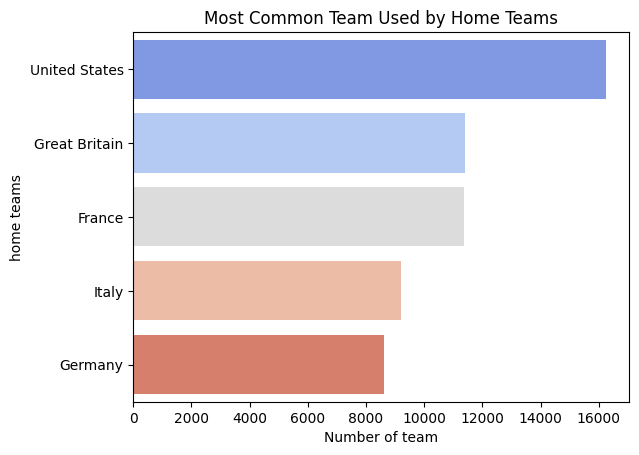

In [21]:
team_counts = data['Team'].value_counts().head()
sns.barplot(x=team_counts.values, y=team_counts.index, palette='coolwarm')
plt.title('Most Common Team Used by Home Teams')
plt.xlabel('Number of team')
plt.ylabel('home teams')
plt.show()

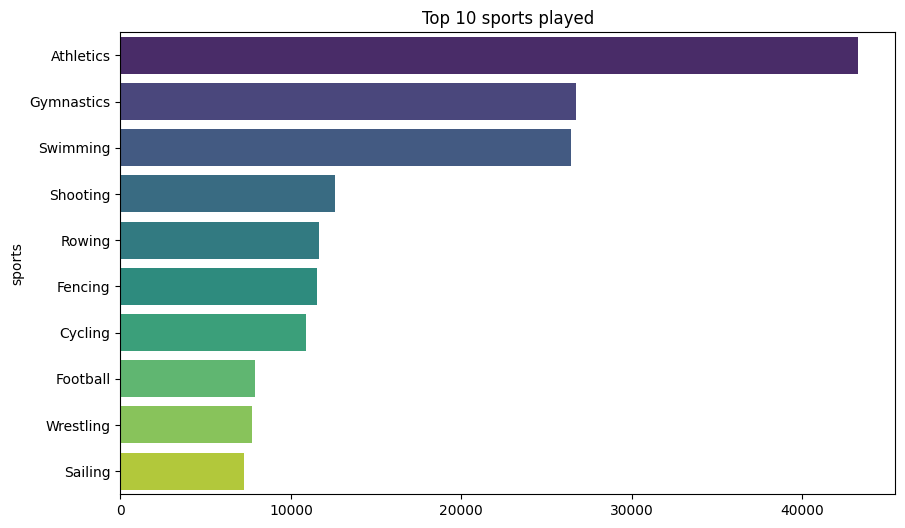

In [22]:
sports_counts = data['Sport'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=sports_counts.values, y=sports_counts.index, palette='viridis')
plt.title('Top 10 sports played')
plt.xlabel('')
plt.ylabel('sports')
plt.show()

In [23]:
top10_athletes=data['Name'].value_counts().head(10)
top10_athletes

Name
John Jr.               76
Robert Mckenzie        58
William Jr.            50
Gustaf Carlberg        49
Heikki Savolainen      39
Joseph Stoffel         38
Ioannis Theofilakis    36
Jos Garca              36
Takashi Ono            33
Jean Jacoby            32
Name: count, dtype: int64

In [24]:
top_athlete = top10_athletes.idxmax()
top_medals = top10_athletes.max()
top_athlete

'John Jr.'

/tmp/ipykernel_36/341050952.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top10_athletes.index, rotation=45, ha='right')


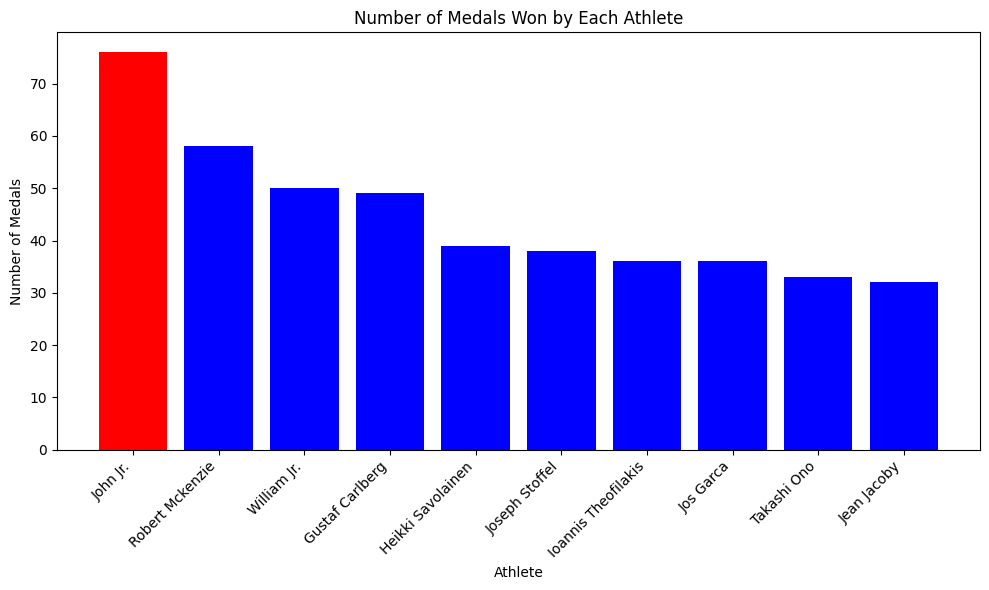

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top10_athletes.index, top10_athletes.values, color='blue')
ax.bar(top_athlete, top_medals, color='red')
ax.set_xlabel('Athlete')
ax.set_ylabel('Number of Medals')
ax.set_title('Number of Medals Won by Each Athlete')
ax.set_xticklabels(top10_athletes.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

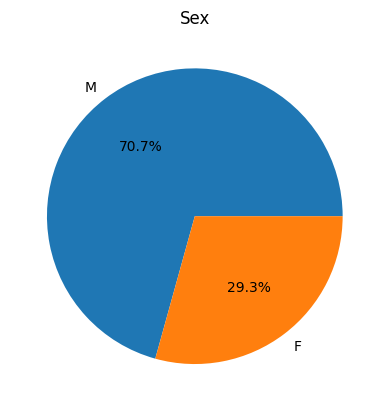

In [26]:
sex=data['Sex'].value_counts()
sex.plot.pie(autopct='%1.1f%%')
plt.title('Sex')
plt.ylabel('')
plt.show()

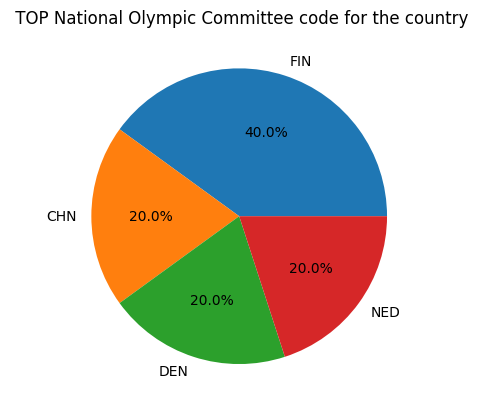

In [27]:
NOC=data['NOC'].head(10).value_counts()
NOC.plot.pie(autopct='%1.1f%%')
plt.title(' TOP National Olympic Committee code for the country')
plt.ylabel('')
plt.show()

array([[<Axes: title={'center': 'Year'}>]], dtype=object)

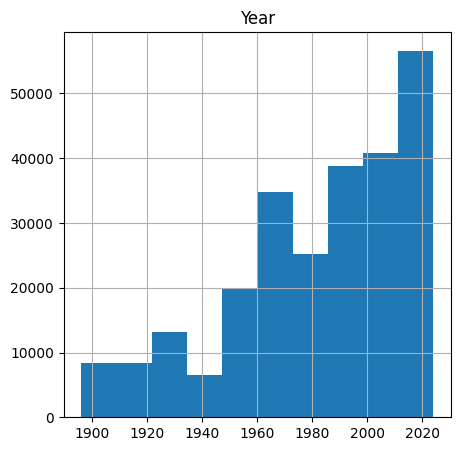

In [28]:
hist_df = data[['Year']]
hist_df.hist(figsize=(5, 5))

In [29]:
medal_counts_per_city = data.groupby(['City', 'Medal']).size().unstack(fill_value=0)
medal_counts_per_city

Medal,Bronze,Gold,No medal,Silver
City,,,,
Amsterdam,250,245,4258,239
Antwerpen,367,493,2984,448
Athina,860,883,12954,859
Atlanta,629,608,11938,605
Barcelona,604,559,11265,549
Beijing,710,671,11554,667
Berlin,295,312,5589,310
Helsinki,300,306,7373,291
London,1214,1215,18802,1195


In [30]:
top10=medal_counts_per_city.head(10)
top10

Medal,Bronze,Gold,No medal,Silver
City,,,,
Amsterdam,250,245,4258,239
Antwerpen,367,493,2984,448
Athina,860,883,12954,859
Atlanta,629,608,11938,605
Barcelona,604,559,11265,549
Beijing,710,671,11554,667
Berlin,295,312,5589,310
Helsinki,300,306,7373,291
London,1214,1215,18802,1195


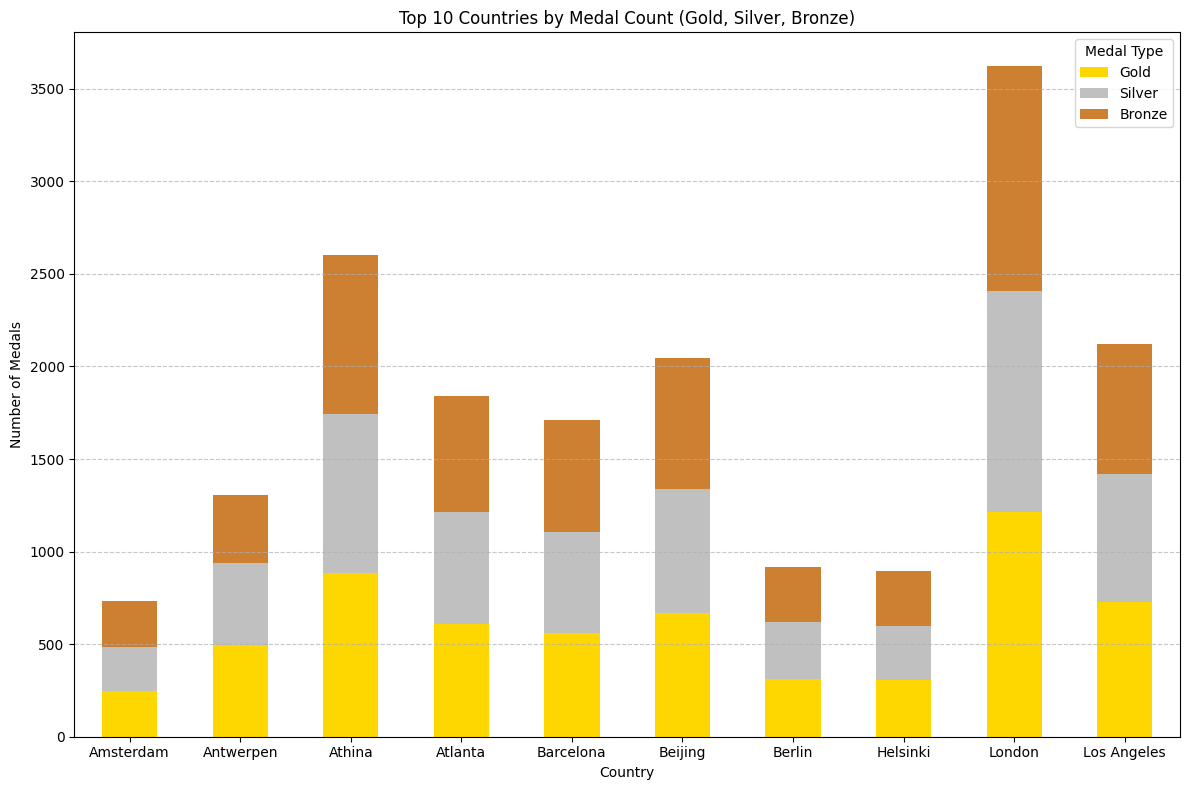

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32'}

top10[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, ax=ax, color=[colors['Gold'], colors['Silver'], colors['Bronze']])

ax.set_title('Top 10 Countries by Medal Count (Gold, Silver, Bronze)')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Medals')
ax.legend(title='Medal Type')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()